<a href="https://colab.research.google.com/github/GabrielMissael/cdecmx/blob/main/C%20-%20Intro%20a%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Pandas.
 
En este cuaderno veremos los elementos y funciones básicas de la librería **Pandas**. Los contenidos específicos son:
 
1. Introducción a Pandas.
2. Dónde encontrar datos.
3. Carga de datos de diferentes formatos.
4. Series y DataFrames.
5. Revisando los datos.
6. Selección de datos por etiqueta.
7. Selección de datos por posición.
8. Operaciones básicas: Estadísticos.
9. Operaciones básicas: Apply.
10. Unión de datos: Concatenación.
 
### Planteamiento del problema:
 
Limpiar, analizar y obtener información de un conjunto de datos tabulados es útil al tratar de **obtener conocimiento** de la información que tenemos. Utilizaremos lo aprendido en este módulo para analizar tres datasets distintos. 
 
## ¿Qué es Pandas? 
 
<center>
    <img width="30%" src="https://pandas.pydata.org/docs/_static/pandas.svg">
</center>
 
**Pandas** es una librería de Python con la que puedes trabajar con datos tabulados. Es muy útil para limpiar, analizar y procesar datos.
 
De acuerdo con Wikipedia: _"(...) es una biblioteca de software escrita como extensión de **NumPy** para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales."_
 
### Objetos en Pandas.
 
En Pandas, los objetos con los que trabajaremos son dos: **DataFrames** y Series. Un DataFrame lo puedes entender como un **tabla** (como las de Excel), y una **Series** como una **tabla con una sola columna**. Más adelante veremos mas a detalle a estos dos objetos que son los objetos base de Pandas.

In [1]:
# Importamos el módulo que aprenderemos en este módulo :)
import pandas as pd

# También usaremos un poco Numpy
import numpy as np

## ¿Dónde encontrar datos?
 
En internet existen repositorios de **datos abiertos** de los que puedes descargar datasets, jugar con ellos, analizarlos y aprender. Algunos ejemplos:
 
1. [Kaggle](https://www.kaggle.com/datasets): Sitio web para prácticar y aprender sobre **ciencia de datos y machine learning**. Además de los datasets que hay en el sitio, ¡puedes correr notebooks como este!. Los dataset están por lo general explicados y listos para usarse.
2. [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php): En este repositorio hay más de **500 datasets** de diversos temas. Usualmente son útiles para practicar y aprender sobre machine learning.
3. [Datos Abiertos de México](https://datos.gob.mx/): En este sitio web se encuentra una recopilación de datos abiertos de diversas instituciones, así como del **gobierno federal y gobiernos estatales**. 
4. [INEGI](https://www.inegi.org.mx/datos/): Datos obtenidos de los diversos **censos** que realiza el Instituto Nacional de Estadística y Geografía.
 
Incluso puedes encontrar **datos abiertos de ciencia**: 
1. [CERN Opendata](https://opendata.cern.ch/): Más de dos petabytes de datos de **física de partículas**.
2. [NASA Open Data Portal](https://data.nasa.gov/): Datos aeroespaciales, de ciencias de la tierra... **¡Muchos datos!**✨
 
Esta no es una lista exhaustiva, hay muchos más recursos disponibles con los que puedes trabajar.


## Carga de datos de diferentes formatos.
 
Con Pandas puedes **cargar datos** de archivos externos, los cuales pueden estar en internet o en tu computadora (quizá bajaste alguna de las páginas de arriba 👀). Por lo general se utilizan datos tabulados (tablas) en Pandas, y los tipos de archivos desde los que puedes cargar datos son varios. Los más comunes son archivos con valores separados por comas_ o CSV, por sus siglas en inglés, con extensión **.csv** y archivos de Excel con extensión **.xlsx**.
 
 
```python
# Para importar un archivo csv
datos = read_csv('nombre_del_archivo.csv')
 
# Para importar un archivo de excel
datos = read_excel('nombre_del_archivo.xlsx') 
```
 
<center>
    <img width="90%" src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">
</center>
 
Hay más tipos de archivos válidos, como **.html** o **.json** y se importan al igual que los ejemplos anteriores. De la misma manera en la que cargamos datos, podemos guardar un DataFrame o una Series en un archivo con extensión válida: 
 
```python
# Guardamos los datos en un archivo CSV
datos.to_csv('datos_guardados.csv')
```
Ahora, cargaremos tres datasets que usaremos más adelante. Este primer dataset viene de: _Kaggle_, [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data). El dataset describe información de personas que viajaban en el Titanic.

In [2]:
# Importamos un archivo de Excel que está en un repositorio en GitHub
df_titanic = pd.read_excel('https://raw.githubusercontent.com/GabrielMissael/'+
                           'cdecmx/gh-pages/assets/datasets/Titanic.xlsx')
 
# Podemos ver el inicio de un DataFrame con .head()
df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


El siguiente dataset viene de muestra dentro de Google Colab, y describe información poblacional e inmobiliaria de California.

In [3]:
# Importamos un archivo CSV que viene de ejemplo en Google Colab
df_casas = pd.read_csv('sample_data/california_housing_test.csv')
df_casas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Finalmente, datos de: [Wikipedia - World population](https://en.wikipedia.org/wiki/World_population), sobre los 10 países más densamente poblados en el mundo.

In [4]:
# Podemos importar tablas que estén en páginas Web como wikipedia
tabla_poblacion = pd.read_html('https://en.wikipedia.org/wiki/World_population', 
                            match = '10 most densely populated countries')

df_poblacion = tabla_poblacion[0].set_index('Country')
df_poblacion

,Rank,Population,Area(km2),Density(pop/km2)
Country,,,,
Singapore,1,5704000,710,8033
Bangladesh,2,171260000,143998,1189
Lebanon,3,6856000,10452,656
Taiwan,4,23604000,36193,652
South Korea,5,51781000,99538,520
Rwanda,6,12374000,26338,470
Haiti,7,11578000,27065,428
Netherlands,8,17630000,41526,425
Israel,9,9390000,22072,426


## Series y DataFrames.
 
Como ya mencionamos, una Series se puede entender como una **tabla con una sola columna**, aunque también puedes verla como una lista donde cada elemento tiene una etiqueta, un **índice** el cual por default es un número entero de la posición del elemento.
 
<center>
    <img width="12%" src="https://pandas.pydata.org/docs/_images/01_table_series.svg">
</center>
Para crear una serie partiendo de una lista:


In [5]:
serie = pd.Series(['Hola', 3.1416, 'A'])

# Imprimimos la serie que creamos
print(serie)

# Información de la serie
print("\nTipo de dato: ", type(serie))
print("Tamaño: ", serie.size)

0      Hola
1    3.1416
2         A
dtype: object

Tipo de dato:  <class 'pandas.core.series.Series'>
Tamaño:  3


Observamos cómo cada elemento de la lista ahora tiene un índice. Podemos especificar el índice explícitamente: 

In [6]:
serie = pd.Series(data = ['Aaa', 'Bbb', 'Ccc'], 
                  index = ['Elemento 1', 'Elemento 2', 'Elemento 2'])
 
print(serie)
 
# Podemos obtener un elemento con su índice
print(serie['Elemento 1'])


Elemento 1    Aaa
Elemento 2    Bbb
Elemento 2    Ccc
dtype: object
Aaa


Los **DataFrames** son más complejos que las Series, ya que ahora tenemos una **tabla con varias columnas**. En este caso, tendremos **índices** para cada fila y también etiquetas para las **columnas**. Los valores default son también enteros que indican la posición.
 
<center>
    <img width="30%" src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">
</center>


In [7]:
# Creemos DataFrame con una matriz aleatoria.
df = pd.DataFrame(data = np.random.rand(3, 4))
 
print("Tipo: ", type(df)) # Tipo de objeto
print("Tamaño: ", df.size)  #El tamaño es igual al número de celdas
df # Visualizamos el DataFrame completo

Tipo:  <class 'pandas.core.frame.DataFrame'>
Tamaño:  12


,0,1,2,3
0,0.793395,0.711644,0.523187,0.162020
1,0.205699,0.956386,0.020772,0.598737
2,0.776242,0.312414,0.449447,0.114186


In [8]:
# Podemos crear DataFrames a partir de diccionarios CUADRADOS
df_dict = pd.DataFrame({
    'Nombre':['Juan', 'María', 'Guadalupe'],
    'Edad':[18, 22, 34],
    'Altura':[1.73, 1.80, 1.50],}, 
    index = ['Persona 1', 'Persona 2', 'Persona 3']) # Especificamos índice
df_dict

,Nombre,Edad,Altura
Persona 1,Juan,18,1.73
Persona 2,María,22,1.80
Persona 3,Guadalupe,34,1.50


Ejercicio: 
- Crea un DataFrame con una matriz de ceros con dimensión (5, 4)
- Asigna números enteros pares como índice.
- Asigna letras como columnas.

In [9]:
# To-Do


## Revisando los datos.
 
Para visualizar los datos de un DataFrame, tenemos dos opciones:
 
```python
# Mostramos las primeras 7 filas.
df.head(n = 7)
 
# Mostramos las últimas 4 filas.
df.tail(n = 4)
```
Si queremos ver un DataFrame completo, lo ponemos solo en una celda.
 
```python
# Para ver todo el DataFrame
df
```
Si el DataFrame es muy grande, no se podrá visualizar completo. Veamos los primeros tres y los últimos cuatro elementos del DataFrame de los datos que cargamos del Titanic.


In [10]:
df_titanic.head(n = 3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
df_titanic.tail(n = 4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Además de consultar partes del DataFrame, también podemos consultar las etiquetas en las **filas** y las **columnas**, así como todos los **valores** del DataFrame.
 
```python
columnas = df.columns  # Obtenemos columnas
indice = df.index  # Obtenemos filas
valores = df.values  # Obtenemos valores
```
Veamos un ejemplo de esto:


In [12]:
columnas = df_dict.columns
filas = df_dict.index
valores = df_dict.values

print('Columnas: ', columnas, '\nFilas: ', filas)
print(valores, type(valores))  # Los valores son una matriz de NumPy!!

df_dict   # Recordamos el DataFrame de donde obtenemos estos valores

Columnas:  Index(['Nombre', 'Edad', 'Altura'], dtype='object') 
Filas:  Index(['Persona 1', 'Persona 2', 'Persona 3'], dtype='object')
[['Juan' 18 1.73]
 ['María' 22 1.8]
 ['Guadalupe' 34 1.5]] <class 'numpy.ndarray'>


,Nombre,Edad,Altura
Persona 1,Juan,18,1.73
Persona 2,María,22,1.80
Persona 3,Guadalupe,34,1.50


Finalmente, cuando tenemos un conjunto de datos, nos será útil hacer un análisis inicial (exploratorio) de los datos. Si consideramos que en las columnas tenemos **variables** y en las filas distintos registros de estas, podemos obtener valores de interés con: 
 
```python
# Describimos en general el DataFrame
df.describe()
```
Por ejemplo, obtenemos una descripción del DataFrame de la densidad poblacional:


In [13]:
df_poblacion.describe()

,Rank,Population,Area(km2),Density(pop/km2)
count,10.00000,1.000000e+01,1.000000e+01,10.000000
mean,5.50000,1.691407e+08,3.695132e+05,1321.900000
std,3.02765,4.288285e+08,1.026117e+06,2369.646924
min,1.00000,5.704000e+06,7.100000e+02,420.000000
25%,3.25000,9.937000e+06,2.313850e+04,426.500000
50%,5.50000,1.500200e+07,3.162900e+04,495.000000
75%,7.75000,4.473675e+07,8.503500e+04,655.000000
max,10.00000,1.381230e+09,3.287240e+06,8033.000000


Obtenemos valores de interés de las variables, como el valor máximo, valor mínimo, media, etc. Pero, ¿qué pasa si tenemos las variables en las filas?. Podemos **trasponer** el DataFrame, de manera similar a lo que se hizo en el módulo de NumPy:
 
```python
# Trasponemos un dataframe y guardamos el resultado
df_traspuesto = df.T
```
Por ejemplo:


In [14]:
df_poblacion_traspuesto = df_poblacion.T
df_poblacion_traspuesto

Country,Singapore,Bangladesh,Lebanon,Taiwan,South Korea,Rwanda,Haiti,Netherlands,Israel,India
Rank,1,2,3,4,5,6,7,8,9,10
Population,5704000,171260000,6856000,23604000,51781000,12374000,11578000,17630000,9390000,1381230000
Area(km2),710,143998,10452,36193,99538,26338,27065,41526,22072,3287240
Density(pop/km2),8033,1189,656,652,520,470,428,425,426,420


Para seleccionar utilizando las **etiquetas** (nombres de filas y columnas) usamos el método **loc()**. Funciona como sigue:
 
```python
# Seleccionamos una sola columna.
serie_columna = df.loc[:, ['Columna1']]
 
# Seleccionamos más de una columna.
df_columnas = df.loc[:, ['Columna1','Columna2']]
 
# Seleccionamos más de una fila.
df_filas = df.loc[['Indice1', 'Indice2'], :]
```
Es importante notar que esta selección no afecta al DataFrame original, y que además lo que no se selecciona se conserva (por ejemplo, al seleccionar una sola columna, el nuevo DataFrame conserva todas las filas). Veamos un ejemplo con los datos de densidad poblacional.


In [15]:
# Seleccionamos dos columnas
rank_densidad = df_poblacion.loc[:,['Rank', 'Density(pop/km2)']]
rank_densidad.head()

,Rank,Density(pop/km2)
Country,,
Singapore,1,8033
Bangladesh,2,1189
Lebanon,3,656
Taiwan,4,652
South Korea,5,520


In [16]:
# Seleccionamos una sola columna
poblacion = df_poblacion.loc[:,['Population']]
poblacion 

,Population
Country,
Singapore,5704000
Bangladesh,171260000
Lebanon,6856000
Taiwan,23604000
South Korea,51781000
Rwanda,12374000
Haiti,11578000
Netherlands,17630000
Israel,9390000


In [17]:
# Seleccionamos solo 3 países (3 filas)
paises_seleccionados = df_poblacion.loc[['India', 'Taiwan', 'Haiti'],:]
paises_seleccionados

,Rank,Population,Area(km2),Density(pop/km2)
Country,,,,
India,10,1381230000,3287240,420
Taiwan,4,23604000,36193,652
Haiti,7,11578000,27065,428


También puedes seleccionar al mismo tiempo columnas y filas:

<center>
    <img width="70%" src="https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg">
</center>

Ejercicio: 
- Del DataFrame de densidad poblacional, filtra las columnas de población y área, y las filas de Singapore, Bangladesh y Lebanon. 

In [18]:
# To-Do


Finalmente, puedes obtener una única celda de dos maneras:

```python
dato = df.loc['Fila', 'Columna']
dato = df.at['Fila', 'Columna'] # Lo mismo, pero más rápido
```
Por ejemplo, obtenemos la densidad poblacional de la India:


In [19]:
densidad_india = df_poblacion.at['India', 'Density(pop/km2)']
print(densidad_india)

420


## Selección de datos por posición.
 
En la sección anterior, seleccionamos dado a **etiquetas**, esto es, con los nombres de las filas y las columnas. Podemos hacer lo mismo pero está vez con la **posición**. Para esto, en lugar de **loc()** y **at()**, usamos **iloc()** y **iat()**. 
 
```python
# Seleccionamos las primeras 2 columnas.
df_columnas = df.iloc[:, 0:1]
 
# Seleccionamos las últimas 3 filas
df_filas = df.iloc[-3:, :]
 
# Elemento unico
dato = df.iat[0, 0]
```
Retomamos el ejemplo con la densidad de población.


In [20]:
poblacion_area = df_poblacion.iloc[:, 1:3]
poblacion_area.head(3)

,Population,Area(km2)
Country,,
Singapore,5704000,710
Bangladesh,171260000,143998
Lebanon,6856000,10452


In [21]:
tres_paises = df_poblacion.iloc[-3:, :]
tres_paises

,Rank,Population,Area(km2),Density(pop/km2)
Country,,,,
Netherlands,8,17630000,41526,425
Israel,9,9390000,22072,426
India,10,1381230000,3287240,420


In [22]:
dato = df_poblacion.iat[3, 3]
print(dato)

652


Ejercicio: 
- Del DataFrame del Titanic, filtra y quédate solo con columnas y filas pares.

In [23]:
# To Do

## Operaciones básicas: Estadísticos.
 
Como se ha mencionado anteriormente, en cada columna normalmente se tendrá una **variable**, como nombres, edad, etc. y en cada fila habrá un registro de esa variable. Hay diversos **estadísticos** qué podemos calcular para conocer más sobre la variable y como se comporta. Por ejemplo, si suponemos que una variable sigue un comportamiento normal, entonces conocer su media (promedio) $\mu$ y su desviación estándar $\sigma$ nos será de mucha utilidad. Si $\mu = 10$ y $\sigma = 3$, tenemos:
 
<center>
    <img width="40%" src="https://i.imgur.com/aqUvIQK.png">
</center>
 
Si quieres ver como hacer una gráfica como esta con Python, visita este [link](https://gist.github.com/GabrielMissael/6987ffd5e7fd83e2906ae201245d847b#file-normal_dist-py). Ya obtuvimos algunos valores con **.describe()**, y ahora veremos algunas otras funciones útiles.
 
```python
# Obtenemos la media de todas las columnas
promedios = df.mean()
 
# Media de una sola columna usando .loc()
promedio = df.loc[:,'Columna1'].mean()
 
# Podemos usar describe() en solo una sección del df
descripcion = df.iloc[0:15, [2, 4]]
 
# También podemos obtener la desviación estándar
stds = df.std()
 
# Valores mínimos y máximos
maxs = df.max()
mins = df.min()
```
Obtengamos algunos valores del dataframe de las casas de California:


In [24]:
# Promedio de población en cada sección
promedio_poblacion = df_casas.loc[:,'population'].mean()
promedio_poblacion

1402.7986666666666

In [25]:
# Desviaciones estándar de cada variable
stds = df_casas.std()
stds

longitude                  1.994936
latitude                   2.129670
housing_median_age        12.555396
total_rooms             2155.593332
total_bedrooms           415.654368
population              1030.543012
households               365.422710
median_income              1.854512
median_house_value    113119.687470
dtype: float64

In [26]:
# Obtenemos el intervalo de las variables
mins = df_casas.min()
maxs = df_casas.max()
intervalo = maxs-mins
intervalo

longitude                  9.6900
latitude                   9.3600
housing_median_age        51.0000
total_rooms            30444.0000
total_bedrooms          5417.0000
population             11930.0000
households              4928.0000
median_income             14.5002
median_house_value    477501.0000
dtype: float64

## Operaciones básicas: Apply.
 
En muchas ocasiones, no sólo estaremos interesados en consultar o describir los datos, si no también en **operarlos**. Podemos aplicar funciones a los datos para obtener valores de interés. Para esto, usamos **.apply()**.
 
```python
# Aplicamos la función seno a los datos
df_seno = df.apply(np.sin)
```
Veamos un ejemplo:


In [27]:
df_seno = df_poblacion.apply(np.sin)
df_seno.head()

,Rank,Population,Area(km2),Density(pop/km2)
Country,,,,
Singapore,0.841471,-0.959596,0.000060,0.052391
Bangladesh,0.909297,-0.332334,-0.040859,0.995695
Lebanon,0.141120,0.968836,0.078677,0.558739
Taiwan,-0.756802,0.985918,0.960547,-0.992865
South Korea,-0.958924,0.628872,-0.219826,-0.997795


En este caso no tiene mucho sentido aplicar $sin(x)$ a datos de población y área; 
 
**Ejercicio**
Queremos conocer la densidad de los países el siguiente año. Si suponemos que la población de todos crecerá un $5\%$, entonces:
- Calcula la nueva población y actualiza esta columna.

In [28]:
# TO DO

## Unión de datos: Concatenación
 
Podemos unir dos DataFrames. Si ambos comparten columnas, entonces será como agregar más filas al final: 
 
<center>
    <img width="70%" src="https://pandas.pydata.org/docs/_images/08_concat_row.svg">
</center>
 
Si se tienen algunas columnas diferentes, el DataFrame final tendrá columnas extra y **valores faltantes** (aunque también puedes elegir eliminar las columnas que no coinciden).
 
Para esto, usamos: 
 
```python
# Unimos dos DataFrames.
df_nuevo = pd.concat([df1, df2])
```
Veamos algunos ejemplos:


In [29]:
df1 = pd.DataFrame(data = np.random.rand(3, 3), 
                   columns = ['A', 'B', 'C'])
df1

,A,B,C
0,0.829581,0.891177,0.880162
1,0.399066,0.158844,0.007566
2,0.157604,0.632530,0.069168


In [30]:
df2 = pd.DataFrame(data = np.random.rand(2, 3), 
                   columns = ['A', 'B', 'C'], 
                   index = ['Elemento 1', 'Elemento 2'])
df2

,A,B,C
Elemento 1,0.335417,0.112746,0.109142
Elemento 2,0.916801,0.376616,0.120646


In [31]:
df3 = pd.DataFrame(data = np.random.rand(2, 3), columns = ['A', 'B', 'D'])
df3

,A,B,D
0,0.606537,0.697093,0.813972
1,0.437390,0.651088,0.005562


In [32]:
df = pd.concat([df1, df2])
df

,A,B,C
0,0.829581,0.891177,0.880162
1,0.399066,0.158844,0.007566
2,0.157604,0.632530,0.069168
Elemento 1,0.335417,0.112746,0.109142
Elemento 2,0.916801,0.376616,0.120646


In [33]:
# Outer o inner
df = pd.concat([df1, df3], join = 'outer')
df

,A,B,C,D
0,0.829581,0.891177,0.880162,NaN
1,0.399066,0.158844,0.007566,NaN
2,0.157604,0.632530,0.069168,NaN
0,0.606537,0.697093,NaN,0.813972
1,0.437390,0.651088,NaN,0.005562


Ejercicio: 
- A partir del dataframe que creaste con la nueva población, crea uno nuevo pero con la densidad poblacional correcta.

## Bonus: Gráficas en pandas.

Podemos gráficar fácilmente los datos en un DataFrame:

```python
# Gráfica de linea
df.plot(x = 'Columna1', y = 'Columna2')

# Gráfica de puntos
df.plot.scatter(x = 'Columna1', y = 'Columna2')
```



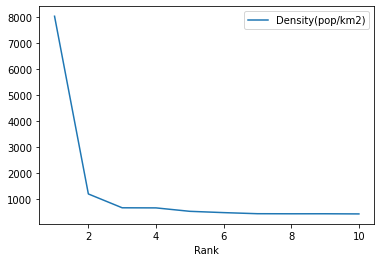

In [34]:
df_poblacion.plot(x = 'Rank', y = 'Density(pop/km2)')

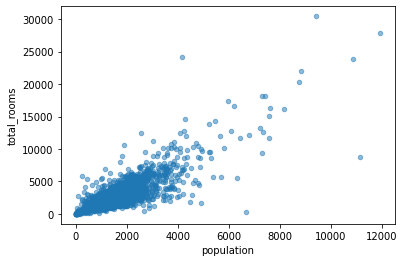

In [35]:
df_casas.plot.scatter(x = 'population', y = 'total_rooms', alpha = 0.5)

-----
> Contenido creado por **Missael Barco** ([CdeCMx](https://clubesdeciencia.mx/) / [Future Lab](https://futurelab.mx/), 2021) <br>
> Contacto: [@GMissaelBarco](https://twitter.com/GMissaelBarco), missaelgabo@gmail.com
